<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Enrique Jair Rodríguez Orozco y Luis Antonio Barriga Adame.

**Fecha:** 14 de Marzo del 2023.

**Expediente** : 727454 y 730512.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Kike14/ProyectoConjunto_EJRodriguez_LABarriga

# Tarea 5: Clase 10

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

#### Código de solución estudiante 1: Enrique

In [4]:
# Librería de optimización 
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

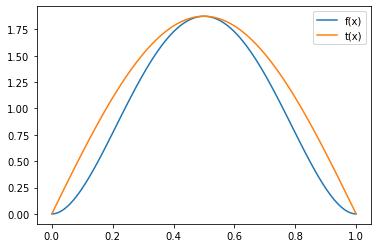

In [87]:
# Código de solución estudiante 1
x = np.arange(0,1.01,0.01)
f = lambda x: 30*(x**2-2*x**3+x**4)

a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t = lambda x: a*np.sin(np.pi*x)

plt.plot(x, f(x), label = 'f(x)')
plt.plot(x, t(x), label = 't(x)')

plt.legend()

$$g(x) = \frac{t(x)}{c} = \frac{a\sin(\pi x)}{\int_{-\infty}^{\infty}a\sin(\pi x)dx}=$$


$$\frac{a\sin(\pi x)}{\int_{0}^{1}a\sin(\pi x)dx} = $$

$$\frac{a\sin(\pi x)}{\frac{2a}{\pi}} = \frac{\pi \sin(\pi x)}{2} $$


$$g(x) = \frac{\pi \sin(\pi x)}{2} $$

$$G(x) = \int_{-\infty}^{x}\frac{\pi \sin(\pi x)}{2}dx = \int_{0}^{x}\frac{\pi \sin(\pi x)}{2}dx = \frac{1}{2}(-\cos(\pi x) + 1) $$

Para $0\le x \le 1$

$$G(x) =  \frac{1}{2}(-\cos(\pi x) + 1)$$

$$\frac{1}{2}(-\cos(\pi x) + 1) = U$$

$$-\cos(\pi x) + 1 = 2U$$

$$\cos(\pi x) = -2U + 1$$

$$x = \frac{\arccos(-2U + 1)}{\pi}$$

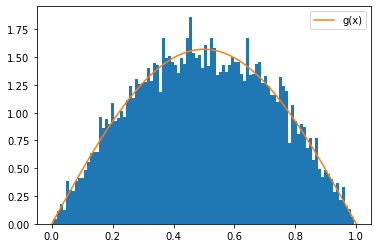

In [88]:
def Inversa(N):
    return (np.arccos(-2*np.random.random(N) + 1))/np.pi
g = lambda x: (np.pi*np.sin(np.pi*x))/2

N = 10000

x_i = Inversa(N)

plt.hist(x_i,100,density=True)
plt.plot(x, g(x), label = 'g(x)')
plt.legend()

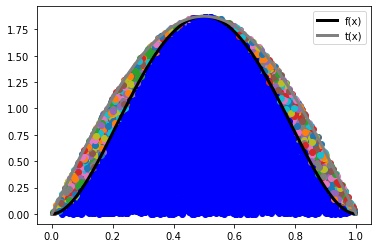

In [89]:
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f', x):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
    plt.plot(x, f(x), label = 'f(x)', linewidth = 3, color = 'black')
    plt.plot(x, t(x), label = 't(x)', linewidth = 3, color = 'gray')

    plt.legend()           
    plt.show()


R2 = np.random.rand(N)
R1 = x_i

Acep_rechazo(R2,R1,f,t, x)

plt.show()

In [99]:
t_1 = lambda x: a * np.ones(len(x))
R1_1 = np.random.rand(N)

def Acep_rechazo3(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return len(x)/len(R1)


print(f'El porcentaje de puntos de aceptación para la t(x) senoidal es de: {Acep_rechazo3(R2,R1,f,t) *100}% y el porcentaje de puntos de aceptación para la t(x) constante es: {Acep_rechazo3(R2,R1_1,f,t_1)*100}%')

El porcentaje de puntos de aceptación para la t(x) senoidal es de: 83.44% y el porcentaje de puntos de aceptación para la t(x) constante es: 53.32%


**Es mejor usar la t(x) senoidal porque se equivoca menos. Esto es debido a que esta función, acota más por todos lados los posibles resultados, al estar más pegadita a f(x).**

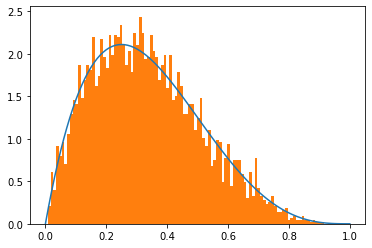

In [111]:
x = np.arange(0,1.01,0.01)
f = lambda x: 20*x*(1-x)**3

max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

t_2 = lambda x: max_f*np.ones(len(x))

R2 = np.random.rand(N)
R1 = np.random.rand(N)


def Acep_rechazo4(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f', x):
    #R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    x_f = [R1[i] for i in range(len(R1)) if condition[i]]
    plt.plot(x, f(x), label = 'f(x)')
    plt.hist(x_f, density = True, bins = 100)
Acep_rechazo4(R2,R1,f,t_2, x)

#### Código de solución estudiante 2: Luis

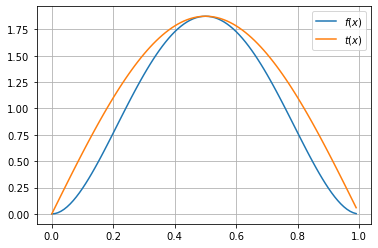

a=:  1.875


In [12]:
# Código de solución estudiante 2
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps 
from math import factorial as fac
from scipy import optimize
from scipy.stats import beta
import pandas as pd
# PUNTO1
# Función f(x)
def f(x):
    return 30*(x**2 - 2*x**3 + x**4)
#f_x = lambda x: 30 *(x**2 - 2*x**3 + x**4)
#Máximo de f(x)
#a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
x = np.arange(0, 1, 0.01)
maxf=f(x)
a=max(maxf)
# Función t(x)
def t(x):
    return a * np.sin(np.pi*x)
#t_x = lambda x: a * np.sin(np.pi * x)
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,t(x), label='$t(x)$')
plt.legend()
plt.grid()
plt.show()
print("a=: ",a)

##### PUNTO 2 Y 3
$$g(x)= \frac{t(x)}{c}$$

$$t(x)=a \sin(\pi x)$$

$$c=\int_{-\infty}^{\infty}t(x)dx$$

$$c=\int_{-\infty}^{\infty}a \sin(\pi x)dx$$

$$=a\cdot \int _0^1\sin \left(\pi x\right)dx$$

$$=a\cdot \int _0^{\pi }\sin \left(u\right)\frac{1}{\pi }du$$

$$=a\frac{1}{\pi }\cdot \int _0^{\pi }\sin \left(u\right)du$$

$$=a\frac{1}{\pi }\left[-\cos \left(u\right)\right]_0^{\pi }$$

$$=a\frac{1}{\pi }\cdot \:2$$

$$c=\frac{2a}{\pi }$$

$$g(x)= \frac{a \sin(\pi x)}{\frac{2a}{\pi }}$$

$$=\frac{a\sin \left(\pi x\right)\pi }{2a}$$

$$g(x)=\frac{\pi \sin \left(\pi x\right)}{2}$$

$$\int _{-\infty }^x\frac{\pi \cdot \:sin\left(\pi \:x\right)}{2}dx$$

$$-\frac{cos\left(\pi x\right)}{2}+\frac{1}{2}=u$$

$$x=\frac{1}{\pi }\arccos \left(1-2u\right)$$

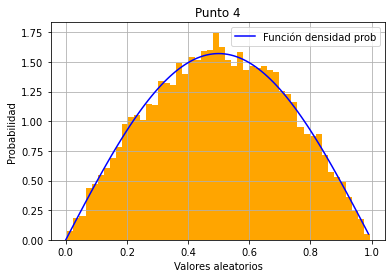

In [13]:
# PUNTO4
N=10000
def g_x(N):
    return np.pi*np.sin(np.pi*x)/(2)

gx=g_x(N)
def g_inversa(N):
    u = np.random.rand(N)
    j = np.arccos(1 - 2*u) / np.pi
    
    return j
Sol1= g_inversa(N)


plt.hist(Sol1,bins=50,density=True, color= "orange")
#plt.plot(x, gx, 'r', linewidth=2)
plt.plot(x, gx, 'b-', label="Función densidad prob")

plt.xlabel("Valores aleatorios")
plt.ylabel("Probabilidad")
plt.title("Punto 4")
plt.legend()
plt.grid()
plt.show()

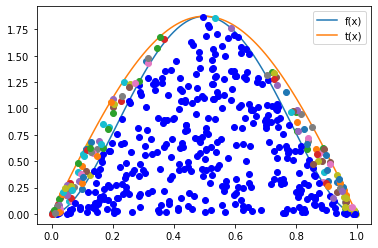

In [14]:
# PUNTO 5
def Acep_rechazo(R2:'Variables distribuidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
# Función objetivo f(x)
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# a (Máximo de la función objetivo)
maxf=f(x)
a=max(maxf)
#a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t(x)
t = lambda x: a * np.sin(np.pi * x)
# Gráficar ambas funciones
x = np.arange(0, 1, 0.01)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend();
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
Acep_rechazo(R2, R1, f, t)

In [15]:
#PUNTO 6
def Prob(R2:'Variables distribuidas U~U(0,1)',
         R1:'Variables distribuidas como g(x)',
         f:'función objetivo a generar',
         t:'función que mayora a f'):
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    return sum(condition)
# Solución
# Función objetivo 
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# Función t(x) senoidal
t_sen = lambda x: a * np.sin(np.pi * x)
# Función t(x) constante
t_const = lambda x: a * np.ones(len(x))
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Probabilidad senoidal
Prob_sen =Prob(R2, R1, f, t)/N
# Probabilidad constante
Prob_const = Prob(R2, R1, f, t_const)/N
print("Porcentaje t(x) senoidal: ",Prob_sen,"Está es mejor")
print("Porcentaje t(x) constante: ",Prob_const)

Porcentaje t(x) senoidal:  0.696 Está es mejor
Porcentaje t(x) constante:  0.54


El máximo de la función es: 2.109375


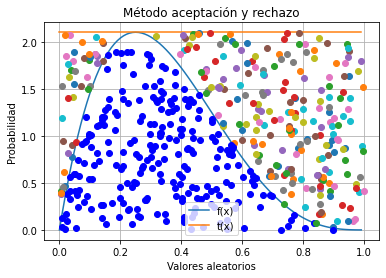

In [16]:

# Función objetivo
f = lambda x: 20*x * (1-x)**3
c = float(f(optimize.fmin(lambda x:-f(x),0,disp=False)))
print("El máximo de la función es:",c)

t = lambda x: c*np.ones(len(x))
x = np.arange(0, 1, 0.01)
# Gráficas de las funciones
plt.plot(x,f(x),label="f(x)")
plt.plot(x,t(x),label="t(x)")
plt.xlabel("Valores aleatorios")
plt.ylabel("Probabilidad")
plt.title("Método aceptación y rechazo")
plt.grid()
plt.legend()
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
Acep_rechazo(R2, R1, f, t)